In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 0.8
plt.rcParams['font.size'] = 9

In [3]:
data = pd.read_csv('../data/TSLA_All.csv')
data.head()

,Unnamed: 0,date,close,high,low,open,volume,year,quarter,month,...,sma_7_low,rsi,k,d,wr,cci,ppo,sentiment_numeric,esp,P/E
0,0,2020-01-02,209.779999,209.789993,206.270004,206.750000,1.207710e+07,2020,1,1,...,207.655221,76.380818,92.364923,94.661666,-7.635077,77.658178,0.000000,1.0,0.163561,1282.579637
1,1,2020-01-03,208.669998,210.399994,206.949997,207.210007,1.118840e+07,2020,1,1,...,207.655221,76.380818,92.364923,94.661666,-7.635077,77.658178,-0.042226,1.0,0.176553,1181.913237
2,2,2020-01-04,209.980001,211.193329,206.806666,207.040003,1.314523e+07,2020,1,1,...,208.065234,76.380818,92.364923,94.661666,-7.635077,77.658178,-0.024991,0.0,0.150271,1397.345602
3,3,2020-01-05,211.290003,211.986664,206.663335,206.870000,1.510207e+07,2020,1,1,...,207.781446,76.380818,92.364923,94.661666,-7.635077,77.658178,0.038602,0.0,0.130799,1615.373422
4,4,2020-01-06,212.600006,212.779999,206.520004,206.699997,1.705890e+07,2020,1,1,...,207.436567,76.380818,92.364923,94.661666,-7.635077,77.658178,0.137642,0.0,0.115795,1835.996698


In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data.set_index('date', inplace=True)

In [6]:
data.head()

,close,high,low,open,volume,year,quarter,month,day,dayofweek,...,sma_7_low,rsi,k,d,wr,cci,ppo,sentiment_numeric,esp,P/E
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,209.779999,209.789993,206.270004,206.750000,1.207710e+07,2020,1,1,2,3,...,207.655221,76.380818,92.364923,94.661666,-7.635077,77.658178,0.000000,1.0,0.163561,1282.579637
2020-01-03,208.669998,210.399994,206.949997,207.210007,1.118840e+07,2020,1,1,3,4,...,207.655221,76.380818,92.364923,94.661666,-7.635077,77.658178,-0.042226,1.0,0.176553,1181.913237
2020-01-04,209.980001,211.193329,206.806666,207.040003,1.314523e+07,2020,1,1,4,5,...,208.065234,76.380818,92.364923,94.661666,-7.635077,77.658178,-0.024991,0.0,0.150271,1397.345602
2020-01-05,211.290003,211.986664,206.663335,206.870000,1.510207e+07,2020,1,1,5,6,...,207.781446,76.380818,92.364923,94.661666,-7.635077,77.658178,0.038602,0.0,0.130799,1615.373422
2020-01-06,212.600006,212.779999,206.520004,206.699997,1.705890e+07,2020,1,1,6,0,...,207.436567,76.380818,92.364923,94.661666,-7.635077,77.658178,0.137642,0.0,0.115795,1835.996698


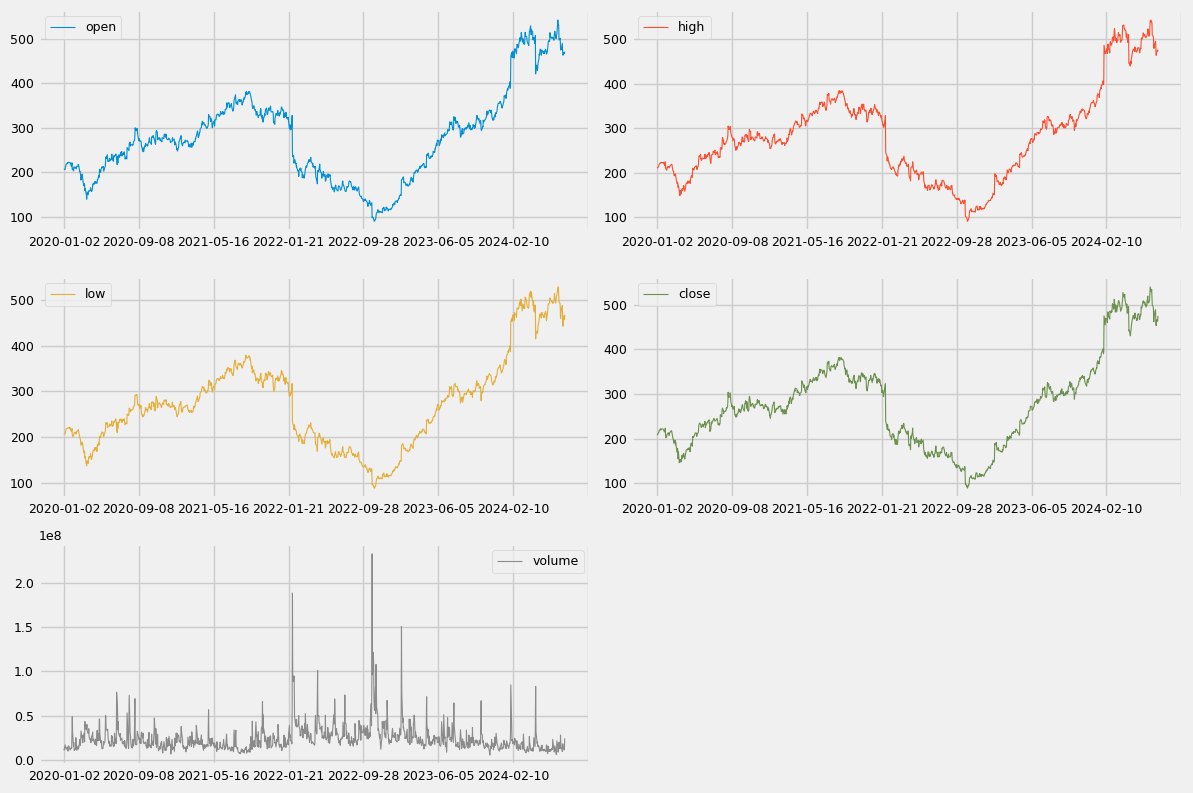

In [7]:
df_plot_1 = data[['open', 'high', 'low', 'close', 'volume']]
df_plot_1.plot(kind='line', subplots=True, title=None, xlabel='', layout=(3, 2), sharex=False, sharey=False, figsize=(12, 8))
plt.tight_layout()


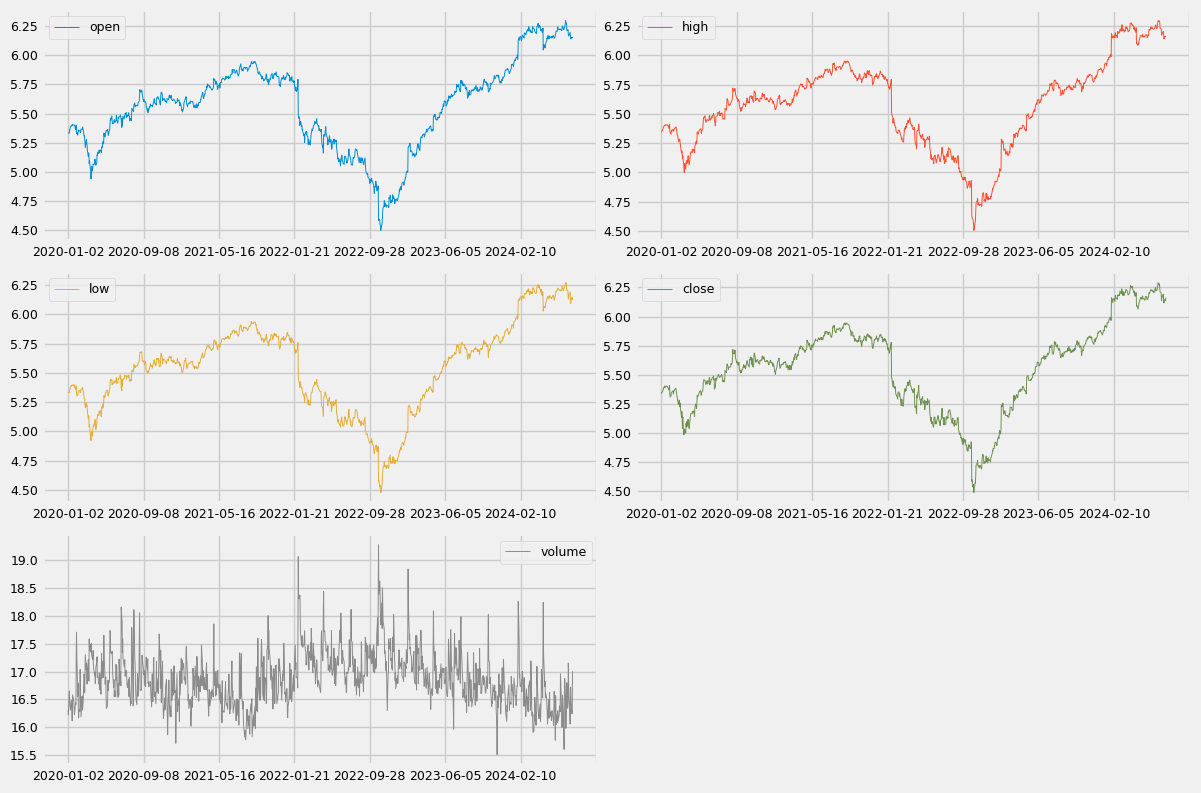

In [8]:
# apply natural logarithm function to the data
df_plot_1.apply(np.log).plot(kind='line', subplots=True,
                        linewidth=0.7, title=None, xlabel='', layout=(3, 2), sharex=False, sharey=False, figsize=(12, 8))
plt.tight_layout()
    
plt.show()

In [9]:
# creat dataframe year
df_agg = pd.DataFrame()

for year in data['year'].unique():
    year_open  = data.loc[data['year'] == year, 'open'][0]
    print(year_open)
    year_close = data.loc[data['year'] == year, 'close'][-1]
    year_low   = data.loc[data['year'] == year, 'low'].min()
    year_high  = data.loc[data['year'] == year, 'high'].max()
    
    df_agg[year] = pd.Series([year_open, year_close, year_low, year_high]) 
    
df_agg = df_agg.T
df_agg = df_agg.set_axis(['open', 'close', 'low', 'high'], axis=1)

# percentage change between the open and close price of the year
df_agg = df_agg.assign(year_change=lambda x: 100 * (x['close'] - x['open'])/ x['open'])
df_agg.head()

206.75
272.6949996948242
341.4466552734375
120.4900016784668
353.2375030517578


C:\Users\DANG QUOC TOAN\AppData\Local\Temp\ipykernel_19964\1518045121.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  year_open  = data.loc[data['year'] == year, 'open'][0]
C:\Users\DANG QUOC TOAN\AppData\Local\Temp\ipykernel_19964\1518045121.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  year_close = data.loc[data['year'] == year, 'close'][-1]
C:\Users\DANG QUOC TOAN\AppData\Local\Temp\ipykernel_19964\1518045121.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a

,open,close,low,high,year_change
2020,206.750000,273.160004,137.100006,304.670013,32.120921
2021,272.695000,336.350006,244.610001,384.329987,23.342931
2022,341.446655,121.439997,88.089996,343.089996,-64.433684
2023,120.490002,350.125000,120.009998,361.899994,190.584277
2024,353.237503,474.829987,340.010010,542.809998,34.422303


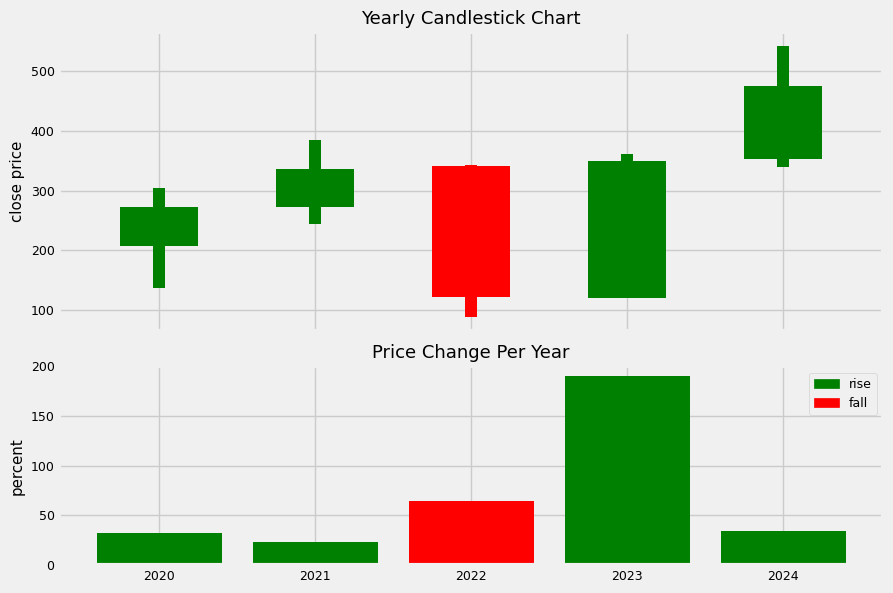

In [10]:
# 'up' dataframe will store the stock prices
# when the closing stock price is greater than or equal to the opening stock prices
up = df_agg.query('`close` >= `open`')

# 'down' dataframe will store the stock prices
# when the closing stock price is lesser than the opening stock prices
down = df_agg.query('`close` < `open`')

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(9, 6), tight_layout=True, gridspec_kw={'height_ratios': [1.5, 1]})

# candlestick plot for yearly data
# up prices of the stock
axes[0].bar(x=up.index, height=up['close']-up['open'], width=0.5, bottom=up['open'], color='green')
axes[0].bar(x=up.index, height=up['high']-up['close'], width=0.08, bottom=up['close'], color='green')
axes[0].bar(x=up.index, height=up['low']-up['open'], width=0.08, bottom=up['open'], color='green')
axes[0].set(title='Yearly Candlestick Chart', ylabel='close price')

# down prices of the stock
axes[0].bar(x=down.index, height=down['close']-down['open'], width=0.5, bottom=down['open'], color='red')
axes[0].bar(x=down.index, height=down['high']-down['open'], width=0.08, bottom=down['open'], color='red')
axes[0].bar(x=down.index, height=down['low']-down['close'], width=0.08, bottom=down['close'], color='red')

# plot percentage price change
colors_ = ['red' if (bar < 0) else 'green' for bar in df_agg['year_change']]

# legend settings
mask_colors = {'rise': 'green', 'fall': 'red'}
labels = list(mask_colors.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color=mask_colors[label]) for label in labels]

axes[1].bar(x=df_agg.index, height=np.abs(df_agg['year_change']), color=colors_)
axes[1].set(title='Price Change Per Year', ylabel='percent')
axes[1].legend(handles, labels)

plt.show()

- Biểu đồ nến (Candlestick chart):
    + Mỗi thanh trong biểu đồ đại diện cho một năm mà giá đóng cửa (close) cao hơn hoặc bằng giá mở cửa (open), với màu xanh lá thể hiện sự tăng giá, với màu đỏ thể hiện sự giảm giá.
    + Các thanh nến sẽ thể hiện giá mở cửa (open), giá đóng cửa (close), giá cao nhất (high), và giá thấp nhất (low) trong từng năm.

- Biểu đồ thay đổi giá theo tỷ lệ phần trăm (Yearly Price Change):
    +  Đo lường sự thay đổi giá cổ phiếu giữa giá mở cửa và giá đóng cửa của mỗi năm, và cho phép so sánh dễ dàng sự thay đổi này giữa các năm.
    + Màu xanh lá: Biểu thị giá tăng (nếu giá đóng cửa lớn hơn giá mở cửa).
    + Màu đỏ: Biểu thị giá giảm (nếu giá đóng cửa nhỏ hơn giá mở cửa)

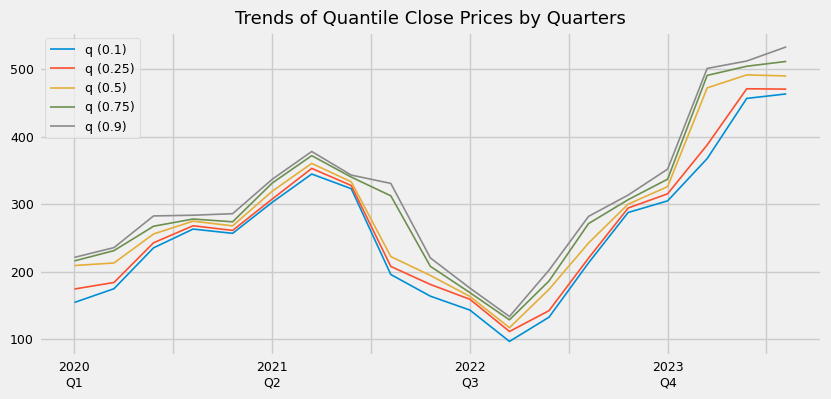

In [11]:
# date in YYYY-QQ format
year_quarter = lambda x: x['year'].astype(str) + '\nQ' + x['quarter'].astype(str)

# close price plot for different quantiles
plt.figure(figsize=(9, 4))

for i in [0.1, 0.25, 0.5, 0.75, 0.9]:
    data.groupby(year_quarter(data))['close'].quantile(i).plot(label='q ({})'.format(i), linewidth=1.2)
    
plt.title('Trends of Quantile Close Prices by Quarters')
plt.xlabel(None)
plt.legend()

plt.show()

- Biểu đồ vẽ các đường biểu thị giá đóng cửa của cổ phiếu ở các phân vị cụ thể (10%, 25%, 50%, 75%, và 90%) trong mỗi quý (quarter) của mỗi năm.
- Các phân vị này cho thấy mức giá đóng cửa của cổ phiếu ở những mức khác nhau:
    + 0.1 (10%): Mức giá thấp (gần 10% thấp nhất trong dữ liệu).
    + 0.25 (25%): Mức giá tại phân vị thứ 25 (dưới trung bình).
    + 0.5 (50%): Mức giá trung bình (median).
    + 0.75 (75%): Mức giá tại phân vị thứ 75 (trên trung bình).
    + 0.9 (90%): Mức giá cao (gần 10% cao nhất trong dữ liệu).

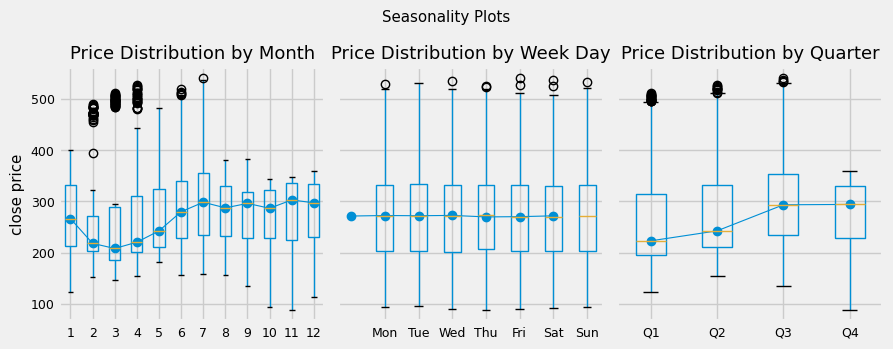

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3.5), sharex=False, sharey=True, tight_layout=True)
axes = axes.ravel()

# price distribution by month
data.boxplot(column='close', by='month', ax=axes[0])
data.groupby('month')['close'].median().plot(style='o-', linewidth=0.8, ax=axes[0])
axes[0].set(title='Price Distribution by Month', xlabel=None, ylabel='close price')

# price distribution by weekend day
data.boxplot(column='close', by='dayofweek', ax=axes[1])
data.groupby('dayofweek')['close'].median().plot(style='o-', linewidth=0.8, ax=axes[1])
axes[1].set(title='Price Distribution by Week Day', xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
            xlabel=None)

# price distribution by year quarter
data.boxplot(column='close', by='quarter', ax=axes[2])
data.groupby('quarter')['close'].median().plot(style='o-', linewidth=0.8, ax=axes[2])
axes[2].set(title='Price Distribution by Quarter', xticklabels=['Q1', 'Q2', 'Q3', 'Q4'], xlabel=None)

fig.suptitle('Seasonality Plots')
plt.show()

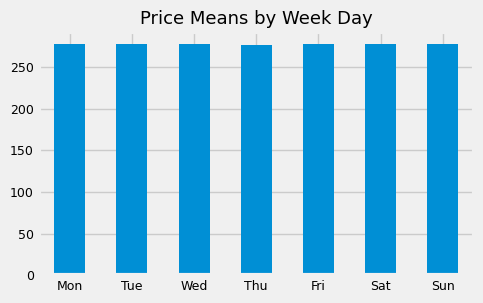

In [13]:
fig, axes = plt.subplots(figsize=(5, 3))

# close price means for each week day
data.groupby(['dayofweek'])['close'].mean().plot(kind='bar')
axes.set(title='Price Means by Week Day', xlabel=None)
axes.set_xticklabels(labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

plt.show()

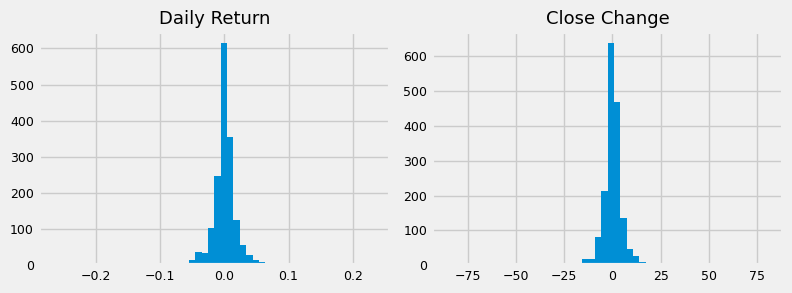

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), tight_layout=True)

axes[0].hist(data['daily_return'], bins=50)
axes[0].set_title('Daily Return')

axes[1].hist(data['close_change'], bins=50)
axes[1].set_title('Close Change')

plt.show()

- Daily return là sự thay đổi tỷ lệ phần trăm của giá cổ phiếu mỗi ngày so với giá cổ phiếu của ngày hôm trước. Biểu đồ này cho thấy có bao nhiêu ngày có mức lợi nhuận hàng ngày trong từng khoảng giá trị cụ thể.
- Thông qua biểu đồ này, bạn có thể quan sát được mức độ biến động của lợi nhuận hàng ngày và xem liệu có phân phối đồng đều hay tập trung vào một phạm vi nào đó.


- Close change là sự thay đổi giá trị tuyệt đối của giá đóng cửa giữa hai ngày liên tiếp.
- Biểu đồ này giúp bạn nhận diện các ngày có thay đổi giá cổ phiếu lớn hay nhỏ, cũng như mức độ biến động giá đóng cửa.


- Ước tính rủi ro của cổ phiếu trong ngắn hạn (qua daily return) và trung hạn (qua close change).

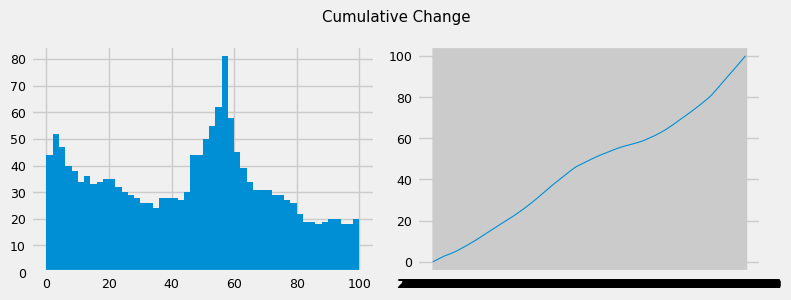

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), tight_layout=True)
fig.suptitle('Cumulative Change')

axes[0].hist(data['cum_change'], bins=50)

axes[1].plot(data['cum_change'])

plt.show()

- Biểu đồ đầu tiên: Histogram of Cumulative là tổng thay đổi giá từ đầu chuỗi thời gian đến một thời điểm cụ thể, phản ánh sự tăng hoặc giảm tổng thể của giá cổ phiếu theo thời gian.Quan sát được sự phân bố của sự thay đổi tích lũy — tức là có bao nhiêu lần sự thay đổi tích lũy rơi vào các phạm vi giá trị nhất định.

- Biểu đồ thứ hai: Line Plot of Cumulative Change:
    + Biểu đồ này thể hiện sự thay đổi tích lũy theo thời gian dưới dạng biểu đồ đường (line plot).
    + Trục hoành thể hiện thời gian, còn trục tung thể hiện giá trị của thay đổi tích lũy. Biểu đồ này cho thấy sự biến động của giá cổ phiếu theo thời gian, với mỗi điểm thể hiện thay đổi tích lũy của cổ phiếu tại thời điểm đó.


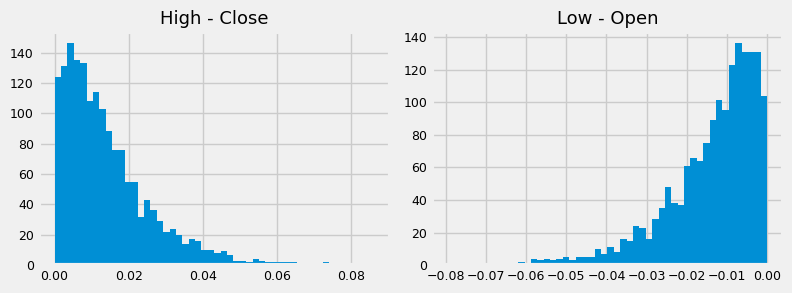

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), tight_layout=True)

axes[0].hist(data['high_close'], bins=50)
axes[0].set_title('High - Close')

axes[1].hist(data['low_open'], bins=50)
axes[1].set_title('Low - Open')

plt.show()

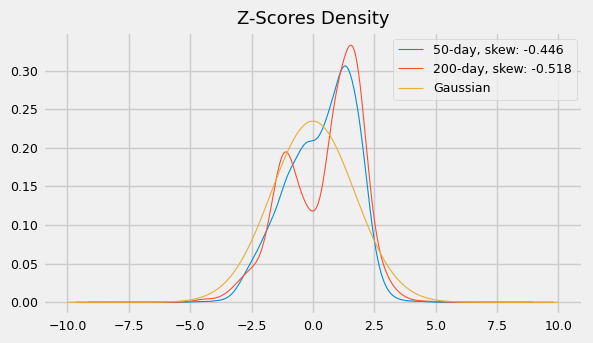

In [17]:
zscore_den = lambda x, m, n: (x['close'] - x['close'].rolling(window=m, min_periods=n).mean())\
               / x['close'].rolling(window=m, min_periods=n).std()


# plot close price distribution after applying Z-score over 50-day & 200-day windows
plt.figure(figsize=(6, 3.5), tight_layout=True)

x_axis = np.arange(-10, 10, 0.001)

zscore_den(data, m=50, n=5).plot.kde(label='50-day, skew: {:.3f}'.format(zscore_den(data, m=50, n=5).skew()))
zscore_den(data, m=200, n=20).plot.kde(label='200-day, skew: {:.3f}'.format(zscore_den(data, m=200, n=20).skew()))
plt.plot(x_axis, norm.pdf(x_axis, loc=0, scale=1.7), label='Gaussian')
plt.title('Z-Scores Density')
plt.ylabel(None)
plt.legend()

plt.show()

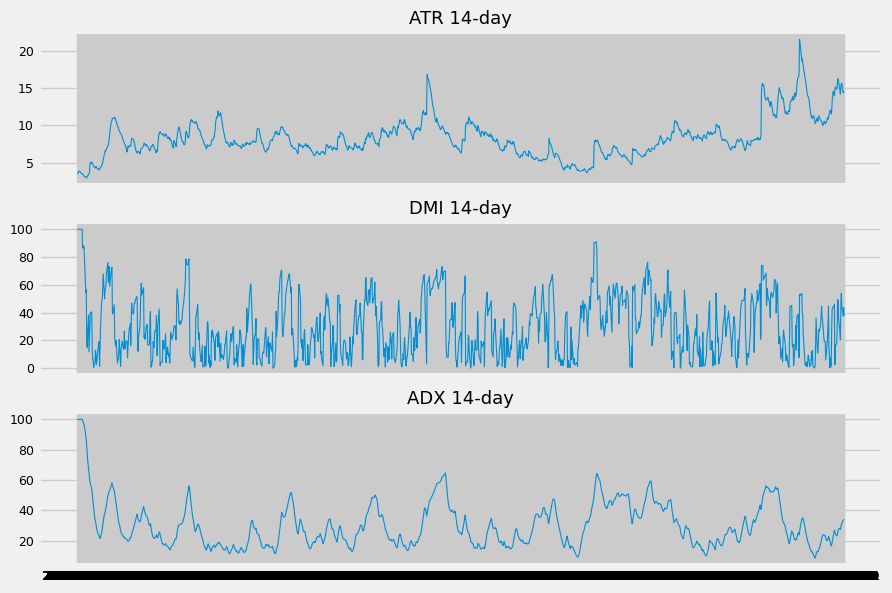

In [18]:
# ATR, DMI, ADX over 4 year period
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(9, 6), tight_layout=True, gridspec_kw={'height_ratios': [2, 2, 2]})

# ATR over 14-day
axes[0].plot(data['atr'])
axes[0].set(title='ATR 14-day')

# DMI over 14-day window
axes[1].plot(data['dmi'])
axes[1].set(title='DMI 14-day')

# ADX over 14-day window
axes[2].plot(data['adx'])
axes[2].set(title='ADX 14-day')

plt.show()

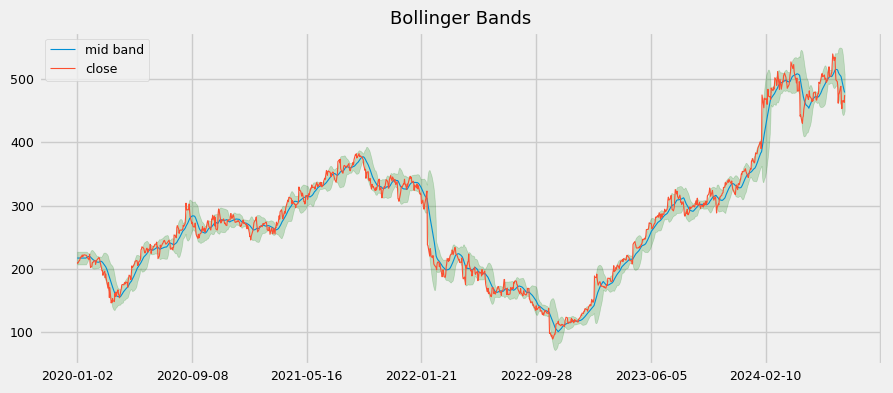

In [19]:
# Bollinger bands for 6 year period
plt.figure(figsize=(9, 4), tight_layout=True)

data['b_ma'].plot(label='mid band')
data['close'].plot(label='close')
plt.fill_between(data.index, data['bu'], data['bl'], color='green', alpha=0.2)
plt.title('Bollinger Bands')
plt.xlabel(None)
plt.legend()

plt.show()

Text(0.5, 0, '')

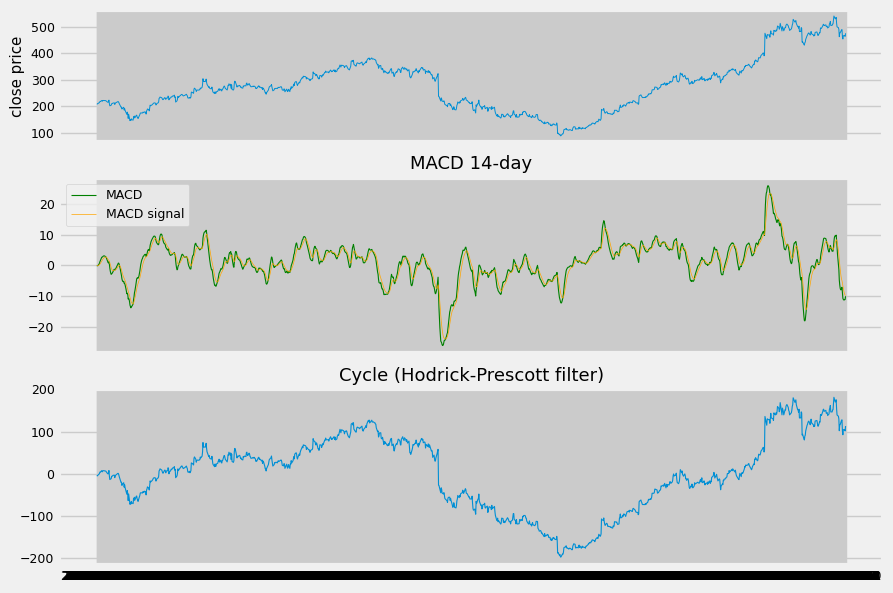

In [20]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(9, 6), tight_layout=True, gridspec_kw={'height_ratios': [1.5, 2, 2]})

axes[0].plot(data['close'], linewidth=0.7)
axes[0].set_ylabel('close price')

# MACD over 14-dy window
axes[1].plot(data['macd'], color='green', label='MACD')
axes[1].plot(data['macd'].ewm(span=9, adjust=False).mean(), linewidth=0.5, color='orange', label='MACD signal')
axes[1].set_title('MACD 14-day')
axes[1].set_xlabel(None)
axes[1].legend()

# cycle
axes[2].plot(data['cycle'], label='cycle')
axes[2].set_title('Cycle (Hodrick-Prescott filter)')
axes[2].set_xlabel(None)

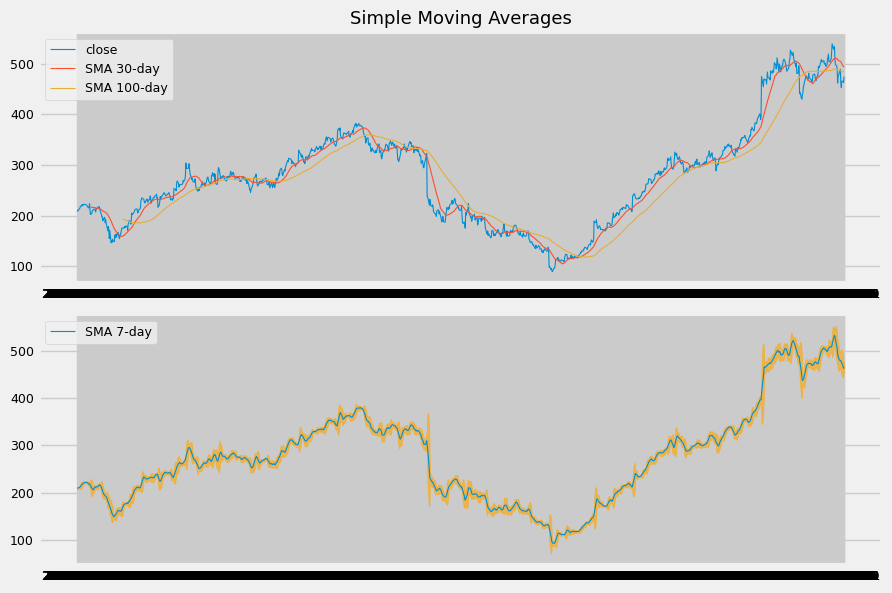

In [21]:
# simple moving averages plot
fig, axes = plt.subplots(2, 1, sharex=False, figsize=(9, 6), tight_layout=True, gridspec_kw={'height_ratios': [2, 2]})

# moving averages over 50-day & 200-day windows
axes[0].plot(data['close'], label='close')
axes[0].plot(data['close'].rolling(30).mean(), label='SMA 30-day')
axes[0].plot(data['close'].rolling(100).mean(), label='SMA 100-day')
axes[0].set_title('Simple Moving Averages')
axes[0].set_xlabel(None)
axes[0].legend()

# moving averages over a 7-day window with confidence intervals
axes[1].plot(data['sma_7'], label='SMA 7-day')
axes[1].fill_between(data.index, data['sma_7_up'], data['sma_7_low'], color='orange', alpha=0.6)
axes[1].set_xlabel(None)
axes[1].legend()

plt.show()

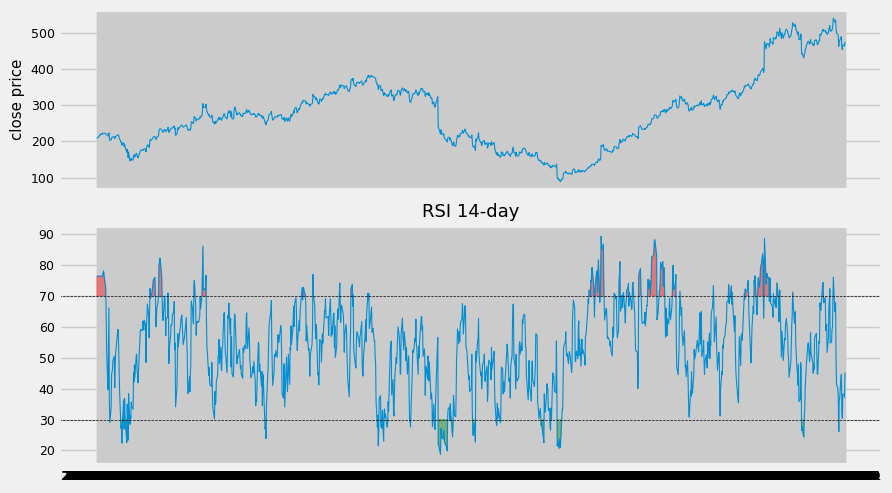

In [22]:
# RSI plot over 4-year period
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(9, 5), tight_layout=True, gridspec_kw={'height_ratios': [1.5, 2]})

axes[0].plot(data['close'])
axes[0].set_ylabel('close price')

axes[1].plot(data['rsi'])
axes[1].axhline(30, linestyle='--', linewidth=0.5, color='black')
axes[1].axhline(70, linestyle='--', linewidth=0.5, color='black')
axes[1].fill_between(data.index, 70, data['rsi'], where=(70 < data['rsi']), color='red', alpha=0.4) # overbought
axes[1].fill_between(data.index, 30, data['rsi'], where=(30 > data['rsi']), color='green', alpha=0.4) # oversold
axes[1].set_title('RSI 14-day')

plt.show()

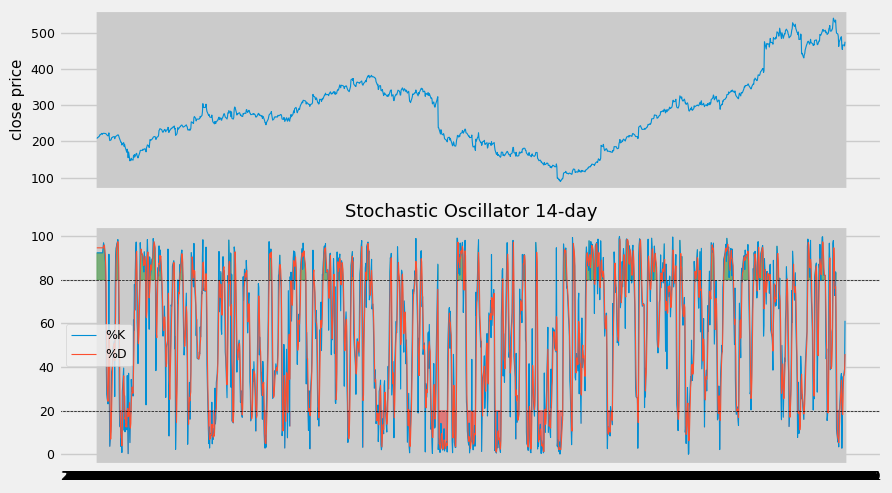

In [23]:
# stochastic oscillator plot over 4-year period
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(9, 5), tight_layout=True, gridspec_kw={'height_ratios': [1.5, 2]})

axes[0].plot(data['close'])
axes[0].set_ylabel('close price')

axes[1].plot(data['k'], label='%K')
axes[1].plot(data['d'], label='%D')
axes[1].axhline(80, linestyle='--', linewidth=0.5, color='black')
axes[1].axhline(20, linestyle='--', linewidth=0.5, color='black')
axes[1].fill_between(data.index, 80, data['k'], where=(80 < data['k']), color='green', alpha=0.4) # overbought
#axes[1].axhspan(20, df['d'].min(), color='red', alpha=0.1) # oversold
axes[1].fill_between(data.index, 20, data['k'], where=(20 > data['k']), color='red', alpha=0.4) # oversold
axes[1].set_title('Stochastic Oscillator 14-day')
axes[1].legend()

plt.show()

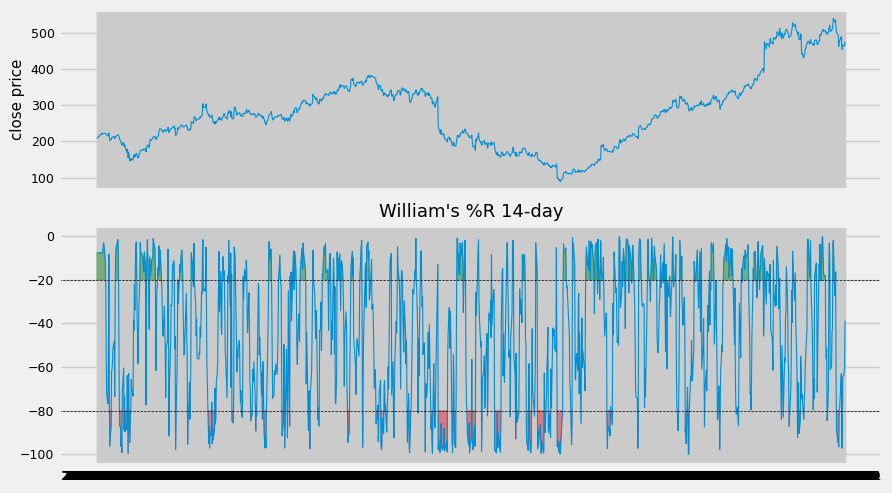

In [24]:
# William's %R plot over 4-year period
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(9, 5), tight_layout=True, gridspec_kw={'height_ratios': [1.5, 2]})

axes[0].plot(data['close'])
axes[0].set_ylabel('close price')

axes[1].plot(data['wr'])
axes[1].axhline(-20, linestyle='--', linewidth=0.5, color='black')
axes[1].axhline(-80, linestyle='--', linewidth=0.5, color='black')
axes[1].fill_between(data.index, -80, data['wr'], where=(-80 > data['wr']), color='red', alpha=0.4) # overbought
axes[1].fill_between(data.index, -20, data['wr'], where=(-20 < data['wr']), color='green', alpha=0.4) # oversold
axes[1].set_title("William's %R 14-day")

plt.show()

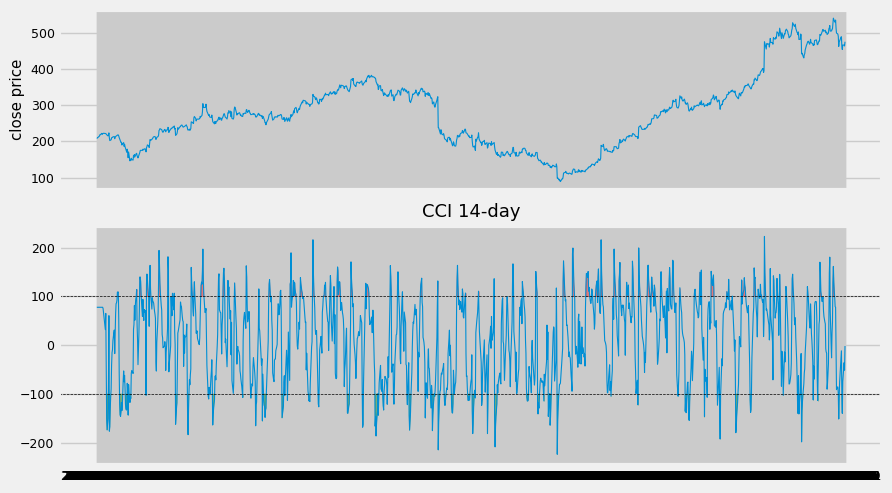

In [25]:
# CCI plot over 4-year period
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(9, 5), tight_layout=True, gridspec_kw={'height_ratios': [1.5, 2]})

axes[0].plot(data['close'])
axes[0].set_ylabel('close price')

axes[1].plot(data['cci'])
axes[1].axhline(100, linestyle='--', linewidth=0.5, color='black')
axes[1].axhline(-100, linestyle='--', linewidth=0.5, color='black')
axes[1].fill_between(data.index, 100, data['cci'], where=(100 < data['cci']), color='red', alpha=0.4) # overbought
axes[1].fill_between(data.index, -100, data['cci'], where=(-100 > data['cci']), color='green', alpha=0.4) # oversold
axes[1].set_title('CCI 14-day')

plt.show()

In [36]:
# Check mối tương quan giữa các feature
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_regression


# split dataset into features and target
X = data.loc[:, data.columns != 'close'].fillna(0)
y = data['close']
# top k features
def select_kbest(k=10):
    '''
    Computes feature selection scores, correlations, p-values, and plots results.
    '''
    pearson_corr = []
    spearman_corr = []
    p_values = []

    for i in range(0, X.shape[1]):
        pearson_corr.append(pearsonr(X.iloc[:, i], y)[0])
        spearman_corr.append(spearmanr(X.iloc[:, i], y)[0])
        p_values.append(pearsonr(X.iloc[:, i], y)[1])
    
    # build feature selector
    feature_selector = SelectKBest(score_func=mutual_info_regression, k=k).fit(X, y)
    
    feat_scores = pd.DataFrame()
    feat_scores['Feature'] = X.columns
    feat_scores['F-score'] = feature_selector.scores_
    feat_scores['Support'] = feature_selector.get_support()
    feat_scores['Pearson'] = pearson_corr
    feat_scores['Spearman'] = spearman_corr
    feat_scores['P-value'] = p_values
    
    feat_scores.sort_values(by='F-score', ascending=False, inplace=True)
    
    return feat_scores

kbest_res = select_kbest(k=15)
kbest_res.style.hide(axis='index')

Feature,F-score,Support,Pearson,Spearman,P-value
high,3.543047,True,0.999519,0.999260,0.000000
low,3.516209,True,0.999541,0.999328,0.000000
cycle,3.212052,True,0.911089,0.908741,0.000000
open,3.007028,True,0.998906,0.998378,0.000000
unix,2.870128,True,0.409917,0.329591,0.000000
cum_change,2.864101,True,0.438289,0.329591,0.000000
sma_7_up,2.670903,True,0.993263,0.990480,0.000000
sma_7,2.622470,True,0.996942,0.996089,0.000000
sma_7_low,2.592305,True,0.993913,0.993557,0.000000
ema_14,2.511183,True,0.995271,0.994175,0.000000


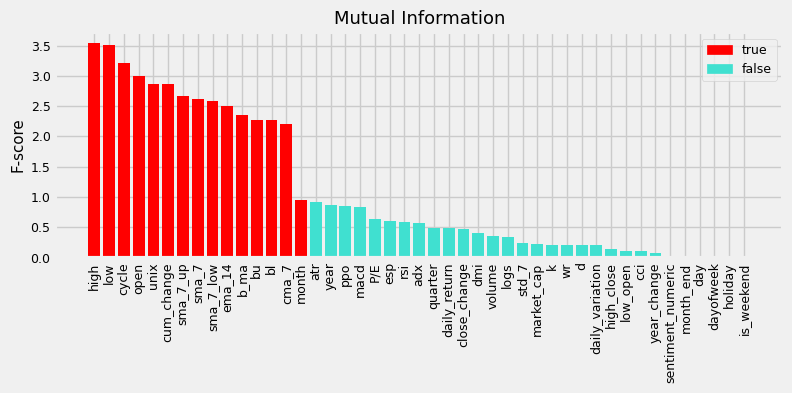

In [37]:
# mutual information results
def plot_results(data):
    '''
    Returns bar plot of scores for each feature.
    '''
    plt.figure(figsize=(8, 4), tight_layout=True)
    colors_ = ['red' if (bar == True) else 'turquoise' for bar in data['Support']]
    
    plt.bar(x=data['Feature'], height=data['F-score'], color=colors_)
    plt.title('Mutual Information')
    plt.ylabel('F-score')
    plt.xticks(rotation=90)
    
    # legend settings
    mask_colors = {'true': 'red', 'false': 'turquoise'}
    labels = list(mask_colors.keys())
    handles = [plt.Rectangle((0, 0), 1, 1, color=mask_colors[label]) for label in labels]
    plt.legend(handles, labels)
    
    plt.show()
    
plot_results(kbest_res)

In [38]:
# top percent features
def select_percentile(percentile=40):
    '''
    Computes feature selection scores, correlations, p-values, and plots results.
    '''
    pearson_corr = []
    spearman_corr = []
    p_values = []

    for i in range(0, X.shape[1]):
        pearson_corr.append(pearsonr(X.iloc[:, i], y)[0])
        spearman_corr.append(spearmanr(X.iloc[:, i], y)[0])
        p_values.append(pearsonr(X.iloc[:, i], y)[1])
    
    # build feature selector
    feature_selector = SelectPercentile(score_func=mutual_info_regression, percentile=percentile).fit(X, y)
    
    feat_scores = pd.DataFrame()
    feat_scores['Feature'] = X.columns
    feat_scores['F-score'] = feature_selector.scores_
    feat_scores['Support'] = feature_selector.get_support()
    feat_scores['Pearson'] = pearson_corr
    feat_scores['Spearman'] = spearman_corr
    feat_scores['P-value'] = p_values
    
    feat_scores.sort_values(by='F-score', ascending=False, inplace=True)
    
    return feat_scores

percentile_res = select_percentile(percentile=40)
percentile_res.style.hide(axis='index')

Feature,F-score,Support,Pearson,Spearman,P-value
high,3.542482,True,0.999519,0.999260,0.000000
low,3.516397,True,0.999541,0.999328,0.000000
cycle,3.212103,True,0.911089,0.908741,0.000000
open,3.006777,True,0.998906,0.998378,0.000000
unix,2.868204,True,0.409917,0.329591,0.000000
cum_change,2.863969,True,0.438289,0.329591,0.000000
sma_7_up,2.670846,True,0.993263,0.990480,0.000000
sma_7,2.622504,True,0.996942,0.996089,0.000000
sma_7_low,2.591848,True,0.993913,0.993557,0.000000
ema_14,2.511141,True,0.995271,0.994175,0.000000


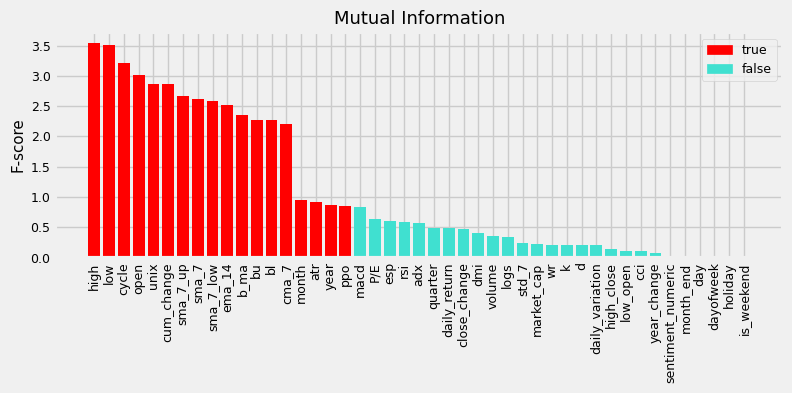

In [39]:
plot_results(percentile_res)


In [41]:
# export variables, add 'close', and remove unwanted 'cycle'
selected_features = percentile_res.query('`Support` == True')['Feature'].tolist()
selected_features.append('close')
selected_features.remove('cycle')

# export data
df_final = data.loc[:, selected_features]
try:
    df_final.to_csv('../data/data_train_model.csv', index=True)
except:
    print('Something went wrong')